In [1]:
import json
import os
import sys

sys.path.append('/home/luis/CGE/luxgiant-dstream')

from luxgiant_dstream.prep_ds import PrepDS
from luxgiant_dstream.gwas_fixed import GWASfixed
from luxgiant_dstream.gwas_random import GWASrandom

In [2]:
#params = json.load(open("//home/luis/data/testDownStream/configFiles/parameters.JSON"))
#paths = json.load(open("/home/luis/data/testDownStream/configFiles/paths_local.JSON"))

params = json.load(open("//home/luis/data/LuxGiantimputed/configFiles/parameters.JSON"))
paths = json.load(open("/home/luis/data/LuxGiantimputed/configFiles/paths_local.JSON"))

In [3]:
#prep = PrepDS(
#    input_path=paths['input_directory'],
#    input_name=paths['input_prefix'],
#    output_path=paths['output_directory'],
#    output_name=paths['output_prefix'],
#    config_dict=params,
#    dependables_path=paths['dependables_directory'],
#)

In [4]:
#prep_steps = {
#    'ld_prune': prep.exclude_high_ld_hla,
#    'pca'     : prep.pca_decomposition
#}
#
#for step in prep_steps.keys():
#    prep_steps[step]()

In [5]:
gwas_f = GWASfixed(
    input_path = paths['input_directory'],
    input_name = paths['input_prefix'],
    output_path= paths['output_directory'],
    output_name= paths['output_prefix'],
    dependables= paths['dependables_directory'],
    config_dict= params,
    preps_path = os.path.join(paths['output_directory'], 'preparatory'),
)
gwas_f.compare_gwas_fixed_file_name = 'european_cohort_nallsEtAl2019_excluding23andMe_allVariants.hg38.tsv'
gwas_f.compare_gwas_fixed_highlights = 'highlighted_european_cohort_nallsEtAl2019_excluding23andMe_allVariants.hg38.csv'

Analysis of GWAS data using a fixed model initialized.


/home/luis/CGE/luxgiant-dstream/luxgiant_dstream/plots.py:361: UserWarning: 
The palette list has fewer values (2) than needed (22) and will cycle, which may produce an uninterpretable plot.
  sns.scatterplot(x=plot_data['upper']['rel_pos'], y=plot_data['upper']['log10p'],
/home/luis/CGE/luxgiant-dstream/luxgiant_dstream/plots.py:381: UserWarning: 
The palette list has fewer values (2) than needed (22) and will cycle, which may produce an uninterpretable plot.
  sns.scatterplot(x=plot_data['lower']['rel_pos'], y=plot_data['lower']['log10p'],


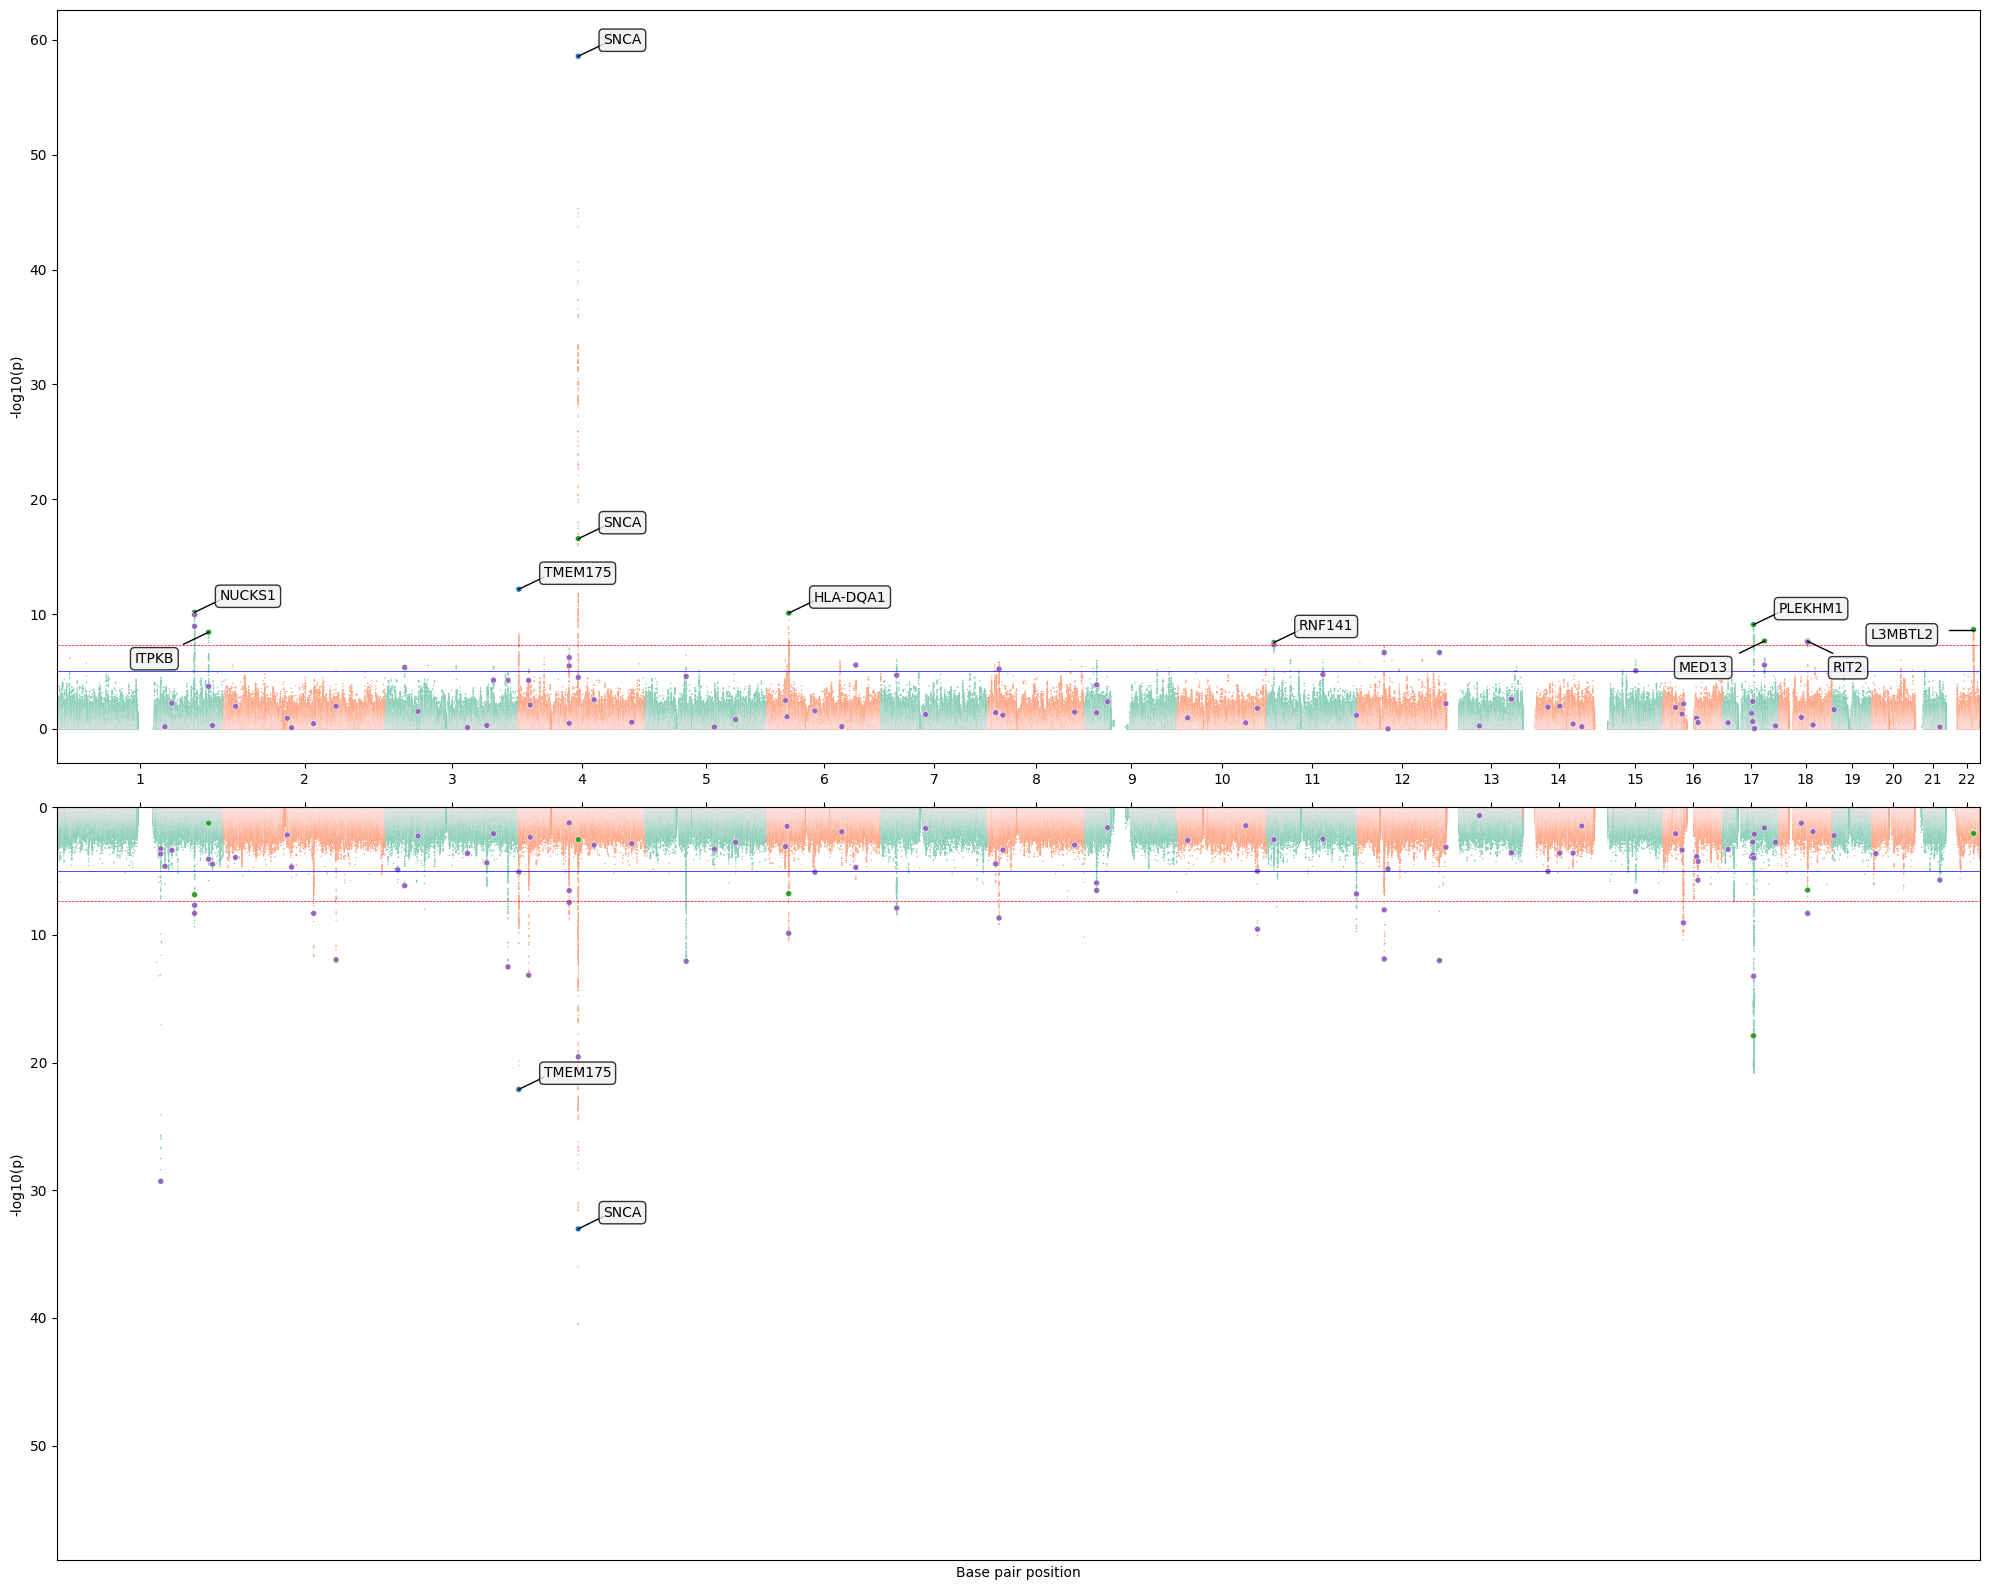

In [6]:
gwas_f_steps = {
    #'train_model': gwas_f.fixed_model_association_analysis,
    #'top_hits'   : gwas_f.get_top_hits,
    #'annotate'   : gwas_f.annotate_top_hits,
    #'plots'      : gwas_f.plot_drawings,
    #'one_cohort' : gwas_f.one_cohort_comparison,
    'trumpet'     : gwas_f.create_trumpet_plot
}

for step in gwas_f_steps.keys():
    gwas_f_steps[step]()

In [7]:
#gwas_r = GWASrandom(
#    input_path = paths['input_directory'],
#    input_name = paths['input_prefix'],
#    output_path= paths['output_directory'],
#    output_name= paths['output_prefix'],
#    config_dict= params,
#    preps_path = os.path.join(paths['output_directory'], 'preparatory'),
#)

In [8]:
#gwas_r_steps = {
#    'preparatory': gwas_r.prepare_aux_files,
#    'grm'        : gwas_r.compute_grm,
#    'random'     : gwas_r.run_gwas_random,
#    'top_hits'   : gwas_r.get_top_hits,
#    'annotate'   : gwas_r.annotate_top_hits,
#    'plots'      : gwas_r.plot_drawings
#}
#for step in gwas_r_steps.keys():
#    gwas_r_steps[step]()

In [11]:
import gwaslab as gl
import pandas as pd

path_to_file = '/home/luis/data/LuxGiantimputed/outputData/gwas_fixed/ds_results_glm.PHENO1.glm.logistic.hybrid'

gwas = pd.read_csv(path_to_file, sep='\t')
gwas

,CHR,POS,SNP,A2,ALT,PROVISIONAL_REF,A1,OMITTED,freq,FIRTH,TEST,N,b,se,L95,U95,Z_STAT,p,ERRCODE
0,1,727242,rs61769339,G,A,Y,A,G,0.181916,N,ADD,11170,0.031144,0.035231,-0.037907,0.100195,0.883995,0.376699,.
1,1,727717,rs61769340,C,G,Y,G,C,0.235228,N,ADD,11170,0.016814,0.032058,-0.046018,0.079646,0.524490,0.599938,.
2,1,758443,rs61769351,G,C,Y,C,G,0.185900,N,ADD,11170,0.020681,0.034927,-0.047775,0.089137,0.592114,0.553774,.
3,1,769257,rs142559957,G,A,Y,A,G,0.055013,N,ADD,11170,-0.081504,0.060305,-0.199701,0.036692,-1.351530,0.176527,.
4,1,796338,rs58276399,T,C,Y,C,T,0.208460,N,ADD,11170,-0.005769,0.033427,-0.071286,0.059747,-0.172597,0.862968,.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5931176,22,50789831,rs7289043,A,G,Y,G,A,0.057565,N,ADD,11170,-0.016376,0.058171,-0.130389,0.097636,-0.281519,0.778312,.
5931177,22,50790460,rs201882178,T,G,Y,G,T,0.251567,N,ADD,11170,0.021227,0.031231,-0.039984,0.082438,0.679681,0.496707,.
5931178,22,50790482,rs80012748,G,A,Y,A,G,0.201835,N,ADD,11170,0.041492,0.033957,-0.025063,0.108046,1.221880,0.221753,.
5931179,22,50791377,rs9616985,T,C,Y,C,T,0.057565,N,ADD,11170,-0.016376,0.058171,-0.130389,0.097636,-0.281519,0.778312,.


In [43]:
my_sumstats = gl.Sumstats(
    path_to_file,
    fmt='plink2_firth',
    rsid='SNP',
    chrom='CHR',
    eaf='freq',
    n='N',
    beta='b',
    p='p',
    se='se',
    build='38',
    ea='A1',
    nea='A2',)

2024/10/09 14:39:00 GWASLab v3.4.48 https://cloufield.github.io/gwaslab/
2024/10/09 14:39:00 (C) 2022-2024, Yunye He, Kamatani Lab, MIT License, gwaslab@gmail.com
2024/10/09 14:39:00 Start to load format from formatbook....
2024/10/09 14:39:00  -plink2_firth format meta info:
2024/10/09 14:39:00   - format_name  : PLINK2 .glm.firth, .glm.logistic[.hybrid]
2024/10/09 14:39:00   - format_source  : https://www.cog-genomics.org/plink/2.0/formats
2024/10/09 14:39:00   - format_version  : Alpha 3.3 final (3 Jun)
2024/10/09 14:39:00   - last_check_date  :  20220806
2024/10/09 14:39:00  -plink2_firth to gwaslab format dictionary:
2024/10/09 14:39:00   - plink2_firth keys: ID,#CHROM,POS,REF,ALT,A1,OBS_CT,A1_FREQ,BETA,LOG(OR)_SE,SE,Z_STAT,P,LOG10_P,MACH_R2,OR,L95,U95
2024/10/09 14:39:00   - gwaslab values: SNPID,CHR,POS,REF,ALT,EA,N,EAF,BETA,SE,SE,Z,P,MLOG10P,INFO,OR,OR_95L,OR_95U
2024/10/09 14:39:00 Start to initialize gl.Sumstats from file :/home/luis/data/LuxGiantimputed/outputData/gwas_fixed

In [44]:
my_sumstats.data

,rsID,CHR,POS,EA,NEA,EAF,BETA,SE,Z,P,OR_95L,OR_95U,N,STATUS,ALT
0,rs61769339,1,727242,A,G,0.181916,0.031144,0.035231,0.883995,0.376699,-0.037907,0.100195,11170,3899999,A
1,rs61769340,1,727717,G,C,0.235228,0.016814,0.032058,0.524490,0.599938,-0.046018,0.079646,11170,3899999,G
2,rs61769351,1,758443,C,G,0.185900,0.020681,0.034927,0.592114,0.553774,-0.047775,0.089137,11170,3899999,C
3,rs142559957,1,769257,A,G,0.055013,-0.081504,0.060305,-1.351530,0.176527,-0.199701,0.036692,11170,3899999,A
4,rs58276399,1,796338,C,T,0.208460,-0.005769,0.033427,-0.172597,0.862968,-0.071286,0.059747,11170,3899999,C
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5931176,rs7289043,22,50789831,G,A,0.057565,-0.016376,0.058171,-0.281519,0.778312,-0.130389,0.097636,11170,3899999,G
5931177,rs201882178,22,50790460,G,T,0.251567,0.021227,0.031231,0.679681,0.496707,-0.039984,0.082438,11170,3899999,G
5931178,rs80012748,22,50790482,A,G,0.201835,0.041492,0.033957,1.221880,0.221753,-0.025063,0.108046,11170,3899999,A
5931179,rs9616985,22,50791377,C,T,0.057565,-0.016376,0.058171,-0.281519,0.778312,-0.130389,0.097636,11170,3899999,C


In [53]:
my_sumstats.data['SNPID'] = my_sumstats.data.apply(lambda x: f"{x['CHR']}:{x['POS']}:{x['EA']}:{x['NEA']}", axis=1)
my_sumstats.data

,rsID,CHR,POS,EA,NEA,EAF,BETA,SE,Z,P,OR_95L,OR_95U,N,STATUS,ALT,SNPID
0,rs61769339,1,727242,A,G,0.181916,0.031144,0.035231,0.883995,0.376699,-0.037907,0.100195,11170,3899999,A,1:727242:A:G
1,rs61769340,1,727717,G,C,0.235228,0.016814,0.032058,0.524490,0.599938,-0.046018,0.079646,11170,3899999,G,1:727717:G:C
2,rs61769351,1,758443,C,G,0.185900,0.020681,0.034927,0.592114,0.553774,-0.047775,0.089137,11170,3899999,C,1:758443:C:G
3,rs142559957,1,769257,A,G,0.055013,-0.081504,0.060305,-1.351530,0.176527,-0.199701,0.036692,11170,3899999,A,1:769257:A:G
4,rs58276399,1,796338,C,T,0.208460,-0.005769,0.033427,-0.172597,0.862968,-0.071286,0.059747,11170,3899999,C,1:796338:C:T
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5931176,rs7289043,22,50789831,G,A,0.057565,-0.016376,0.058171,-0.281519,0.778312,-0.130389,0.097636,11170,3899999,G,22:50789831:G:A
5931177,rs201882178,22,50790460,G,T,0.251567,0.021227,0.031231,0.679681,0.496707,-0.039984,0.082438,11170,3899999,G,22:50790460:G:T
5931178,rs80012748,22,50790482,A,G,0.201835,0.041492,0.033957,1.221880,0.221753,-0.025063,0.108046,11170,3899999,A,22:50790482:A:G
5931179,rs9616985,22,50791377,C,T,0.057565,-0.016376,0.058171,-0.281519,0.778312,-0.130389,0.097636,11170,3899999,C,22:50791377:C:T


In [59]:
df_fam = pd.read_csv(
    os.path.join(gwas_f.preps_path, gwas_f.output_name + '_LDpruned.fam'),
    sep='\t',
    header=None,
)
C_and_c = df_fam[5].value_counts().reset_index()

In [60]:
C_and_c

,5,count
0,1,6364
1,2,4806


2024/10/09 15:05:57 Start to create trumpet plot...
2024/10/09 15:05:57  -Prevalence is not given. Estimating based on scase and scontrol :0.43025962399283796...
2024/10/09 15:05:57  -Settings:
2024/10/09 15:05:57   -Mode: b
2024/10/09 15:05:57   -N_CASE: 4806
2024/10/09 15:05:57   -N_CONTROL: 6364
2024/10/09 15:05:57   -PREVALENCE: 0.43025962399283796
2024/10/09 15:05:57   -BETA: BETA
2024/10/09 15:05:57   -Significance level: 5e-08
2024/10/09 15:05:57   -Power thresholds: [0.2, 0.4, 0.6, 0.8]
2024/10/09 15:05:57   -Power line smoothness: 1000
2024/10/09 15:05:57  -Excluding variants with P values > 5e-08
2024/10/09 15:05:57  -Plotting 880 variants...
2024/10/09 15:05:57  -Flipping 0 variants...
2024/10/09 15:05:57  -Updating eaf-beta matrix...
2024/10/09 15:05:57  -GRR is approximated using OR. For prevalence < 10%, GRR is very similar to OR....
2024/10/09 15:05:57  -Extracting eaf-beta combinations with power = 0.2...
2024/10/09 15:05:57  -Updating eaf-beta matrix...
2024/10/09 15:0

2024/10/09 15:05:58  -Extracting eaf-beta combinations with power = 0.6...
2024/10/09 15:05:58  -Updating eaf-beta matrix...
2024/10/09 15:05:58  -GRR is approximated using OR. For prevalence < 10%, GRR is very similar to OR....
2024/10/09 15:05:58  -Extracting eaf-beta combinations with power = 0.8...
2024/10/09 15:05:58 Start to save figure...
2024/10/09 15:05:58  -Skip saving figure!
2024/10/09 15:05:58 Finished saving figure...
2024/10/09 15:05:58 Finished creating trumpet plot!


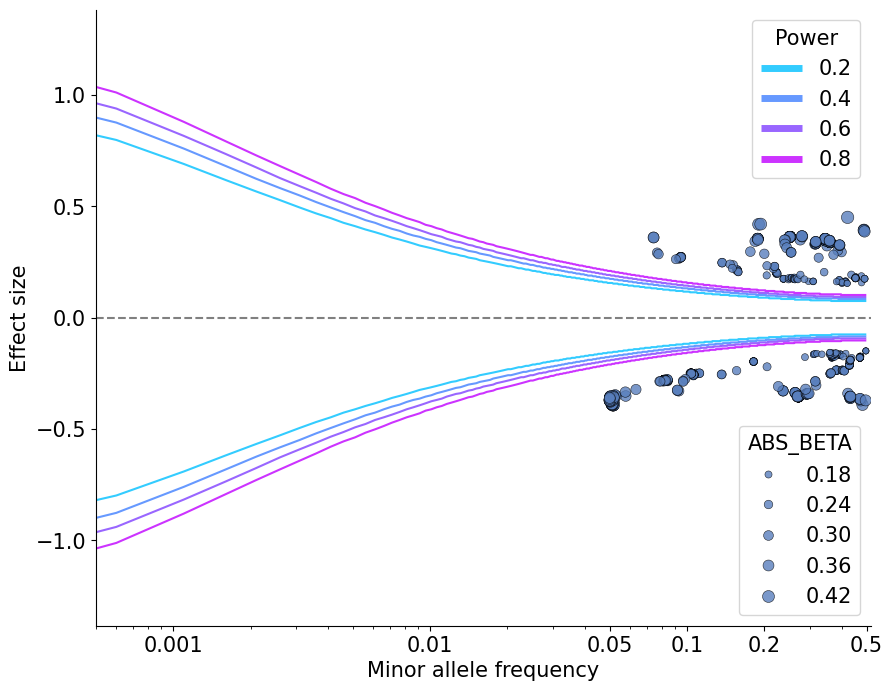

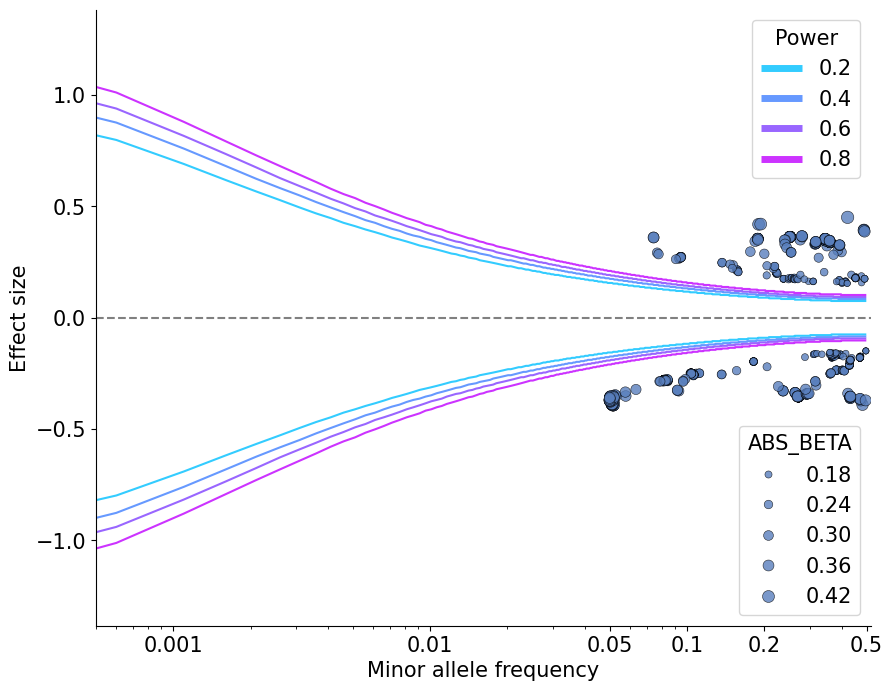

In [61]:
my_sumstats.plot_trumpet(mode='b', ncase=4806, ncontrol=6364)

In [63]:
my_sumstats.fill_data(to_fill=["MAF"])
my_sumstats.data

2024/10/09 15:30:34 Start filling data using existing columns...v3.4.48
2024/10/09 15:30:34  -Column  : SNPID  rsID   CHR    POS   EA       NEA      EAF     MAF     BETA    SE      Z       P       OR_95L  OR_95U  N     STATUS   ALT   
2024/10/09 15:30:34  -DType   : object object string int64 category category float64 float64 float64 float64 float64 float64 float64 float64 int64 category object
2024/10/09 15:30:34  -Verified: T      T      F      T     T        T        T       T       T       T       T       T       T       T       T     T        F     
2024/10/09 15:30:34  #WARNING! Columns with possibly incompatible dtypes: CHR,ALT
2024/10/09 15:30:34  -Overwrite mode:  False
2024/10/09 15:30:34   -Skipping columns:  ['MAF']
2024/10/09 15:30:34  -No available columns to fill. Skipping.
2024/10/09 15:30:34 Finished filling data using existing columns.
2024/10/09 15:30:34 Start to reorder the columns...v3.4.48
2024/10/09 15:30:34  -Current Dataframe shape : 5931181 x 17 ; Memory usage

,SNPID,rsID,CHR,POS,EA,NEA,EAF,MAF,BETA,SE,Z,P,OR_95L,OR_95U,N,STATUS,ALT
0,1:727242:A:G,rs61769339,1,727242,A,G,0.181916,0.181916,0.031144,0.035231,0.883995,0.376699,-0.037907,0.100195,11170,3899999,A
1,1:727717:G:C,rs61769340,1,727717,G,C,0.235228,0.235228,0.016814,0.032058,0.524490,0.599938,-0.046018,0.079646,11170,3899999,G
2,1:758443:C:G,rs61769351,1,758443,C,G,0.185900,0.185900,0.020681,0.034927,0.592114,0.553774,-0.047775,0.089137,11170,3899999,C
3,1:769257:A:G,rs142559957,1,769257,A,G,0.055013,0.055013,-0.081504,0.060305,-1.351530,0.176527,-0.199701,0.036692,11170,3899999,A
4,1:796338:C:T,rs58276399,1,796338,C,T,0.208460,0.208460,-0.005769,0.033427,-0.172597,0.862968,-0.071286,0.059747,11170,3899999,C
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5931176,22:50789831:G:A,rs7289043,22,50789831,G,A,0.057565,0.057565,-0.016376,0.058171,-0.281519,0.778312,-0.130389,0.097636,11170,3899999,G
5931177,22:50790460:G:T,rs201882178,22,50790460,G,T,0.251567,0.251567,0.021227,0.031231,0.679681,0.496707,-0.039984,0.082438,11170,3899999,G
5931178,22:50790482:A:G,rs80012748,22,50790482,A,G,0.201835,0.201835,0.041492,0.033957,1.221880,0.221753,-0.025063,0.108046,11170,3899999,A
5931179,22:50791377:C:T,rs9616985,22,50791377,C,T,0.057565,0.057565,-0.016376,0.058171,-0.281519,0.778312,-0.130389,0.097636,11170,3899999,C


(880, 17)


<Axes: xlabel='MAF', ylabel='BETA'>

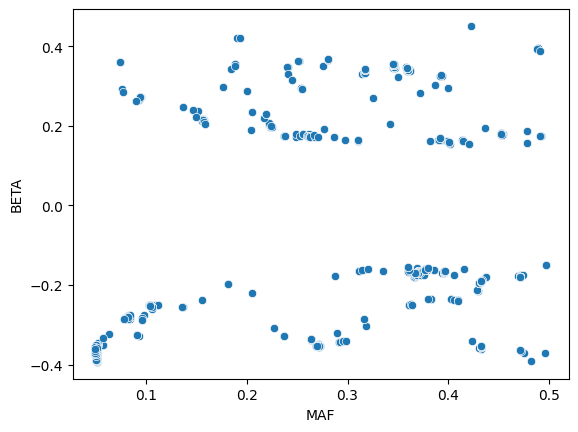

In [67]:
import seaborn as sns
import gwaslab as gl

from gwaslab.util_in_calculate_power import get_beta_binary

my_data = my_sumstats.data[my_sumstats.data['P'] < 5e-8].reset_index(drop=True)
print(my_data.shape)

xpower = get_beta_binary(        
    eaf_range=maf_range,
    beta_range=beta_range, 
    prevalence=4806/(4806+6364),
    or_to_rr = or_to_rr,
    ncase=4806, 
    ncontrol=6364, 
    t=t,
    sig_level=5e-8,
    n_matrix=1000
)

sns.scatterplot(x='MAF', y='BETA', data=my_data)